In [1]:
from __future__ import print_function

# Author: Gael Varoquaux gael.varoquaux@normalesup.org
# License: BSD 3 clause

import sys
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from six.moves.urllib.request import urlopen
from six.moves.urllib.parse import urlencode
from sklearn import cluster, covariance, manifold

## read files

In [2]:
from sklearn import covariance, cluster
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# read csv as df
def csv2df(csvFile):
    reader = csv.reader(csvFile)

    # create empty dict
    count = 0
    index = []
    data = []
    result = {}
    for item in reader:
        # ignore first row
        if reader.line_num == 1:
            del item[0]
            Col = item
            continue
        index.append(item[0])
        del item[0]
        data.append(item)
        count +=1 
    df = pd.DataFrame(data,
              index=index,
              columns=Col)
    return(df)
# read csv as sr
def csv2sr(csvFile):
    reader = csv.reader(csvFile)

    # create empty dict
    count = 0
    index = []
    data = []
    result = {}
    for item in reader:
        # ignore first row
        if reader.line_num == 1:
            del item[0]
            Col = item
            continue
        index.append(item[0])
        del item[0]
        data.append(item)
        count +=1 
#     df = pd.Series(data,
#               index=index)
    return(data)

csvFile = open("./data/data_final.csv", "r")        
stock = csv2df(csvFile)
stock = stock.astype(float)
csvFile.close()

stock.head()

,AAN,ABAX,ABMD,ABT,ABX,ACET,ADBE,ADM,AEGN,AEM,...,WWD,WWW,X,XEL,XOM,XRAY,YPF,YRCW,YUM,ZEUS
1998-01-02,4.717651,2.516668,8.12500,6.044683,13.995399,1.906728,4.709970,12.013385,8.0000,4.759688,...,1.447951,4.735277,22.730032,11.173538,17.025299,8.127704,9.783392,186186.187500,3.554385,14.353699
1998-01-05,4.650257,2.692249,8.15625,6.078298,13.253914,1.963140,4.775387,12.048007,7.8750,4.650270,...,1.447951,4.810439,22.638388,11.077009,16.836136,7.820356,9.587009,195052.203125,3.447600,14.237948
1998-01-06,4.785047,2.516668,8.25000,5.977458,12.605116,1.895445,4.935294,11.771040,7.9062,4.540853,...,1.454247,4.873077,22.363426,10.920140,16.234230,7.956956,8.980013,194118.937500,3.302679,14.816725
1998-01-07,4.582862,2.516668,8.53125,6.016672,12.790489,1.895445,4.862608,12.498084,8.0000,4.595561,...,1.447951,4.772857,23.005003,10.811544,16.750149,7.820356,9.104983,188052.718750,3.295051,14.932483
1998-01-08,4.448073,2.575195,8.68750,6.095102,11.909986,1.850317,4.906220,12.428842,8.1250,4.486144,...,1.447951,4.559895,22.959171,10.835681,16.389009,7.769133,8.618469,181053.234375,3.165385,15.858521


In [79]:
labelFile = open("./data/cluster_num25.csv", "r")  
print(type(labelFile))
labelFile.close()

<class '_io.TextIOWrapper'>


# Draw plot

In [4]:
from __future__ import print_function

# Author: Gael Varoquaux gael.varoquaux@normalesup.org
# License: BSD 3 clause

import sys
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from six.moves.urllib.request import urlopen
from six.moves.urllib.parse import urlencode
from sklearn import cluster, covariance, manifold
import random
print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
# #############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphLassoCV()

In [53]:
# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery

X = stock.copy()

X /= X.std(axis=0)
stock_sel = stock.columns[:100]
date_sel = stock.index[:2000]
X = X.loc[date_sel,stock_sel]
# print(X.loc[stock_sel,date_sel])

print("half done")

edge_model.fit(X)

half done


/usr/local/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:230: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/usr/local/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:232: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/usr/local/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


GraphLassoCV(alphas=4, assume_centered=False, cv=None, enet_tol=0.0001,
       max_iter=100, mode='cd', n_jobs=1, n_refinements=4, tol=0.0001,
       verbose=False)

In [54]:
labelFile = open("./data/cluster_num25.csv", "r")
labels = csv2sr(labelFile)[0]
labels = np.array(labels, dtype=float)
labels.astype(float)
# for i in range(len(labels)):
# #     print(i)
#     labels[i] = float(labels[i])
#     print(type(labels[i]))
#     print(type(labels[0][i]))
print(type(labels))
labels = pd.Series(labels,
                    index = stock.columns)


####
# labels = pd.Series(np.random.randint(1,5,482),
#                     index = stock.columns)
labels = labels[:100]
# labels

<class 'numpy.ndarray'>


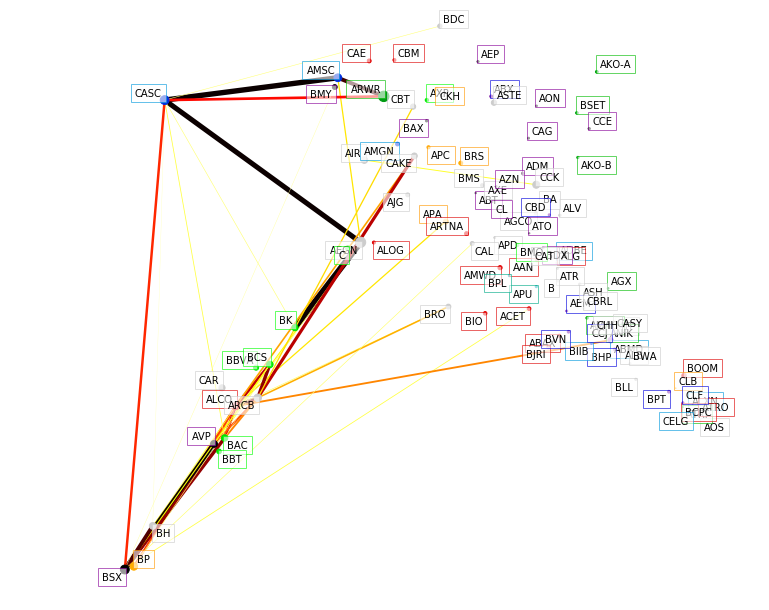

In [55]:
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.

node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=10)

embedding = node_position_model.fit_transform(X.T).T

# #############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1, 1])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
# plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
#             cmap=plt.cm.spectral)
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)
# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)


##########

n_labels = labels.max()
names = stock.columns
#Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()